# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [37]:
# Imports
from utils import get_dataset
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np

In [29]:
#fname = "segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord"
fname="*"
dataset = get_dataset("/app/project/data/waymo/train/{}".format(fname))

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/waymo/train/*']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/waymo/train/*']
INFO:tensorflow:Number of filenames to read: 77


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [49]:
CLASS_COLORS = {
    1 : {
        'color' : 'r',
        'label' : 'vehicle'
    },
    2 : {
        'color' : 'b',
        'label' : 'pedestrian'
    },
    4 : {
        'color' : 'g',
        'label' : 'cyclist'
    }
}

def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    for item in batch:
        # Grab relevant data points
        image = item['image']
        bboxes = item['groundtruth_boxes']
        classes = item['groundtruth_classes']

        # Generate plot
        fig, ax = plt.subplots()
        ax.imshow(image)
        
        # Set axis labels
        #ax.set_xlabel('X')
        #ax.set_ylabel('Y')
        
        # Keep track of legend labels
        colors_used = []
        patches_legend = []

        # Create bounding boxes
        for i in range(len(bboxes)):
            class_id = int(classes[i])
            box = bboxes[i]
            # Get bbox rectangle
            x = box[1] * image.shape[1] # column = x
            y = box[0] * image.shape[0] # row  = y
            width = (box[3]-box[1]) * image.shape[0]
            height = (box[2]-box[0]) * image.shape[1]
            # Determine class color
            color = CLASS_COLORS[class_id]['color']
            label = CLASS_COLORS[class_id]['label']
            rect = patches.Rectangle((x,y), width, height, linewidth=1, edgecolor=color, facecolor='none', label=label)
            ax.add_patch(rect)
            # Keep track of legend labels
            if color not in colors_used:
                colors_used.append(color)
                patches_legend.append(rect)
            
        # Create legend
        plt.legend(handles=patches_legend)
            
        fig.show()  

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

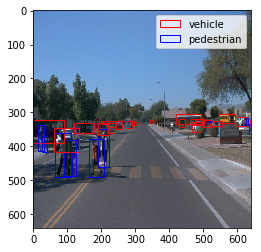

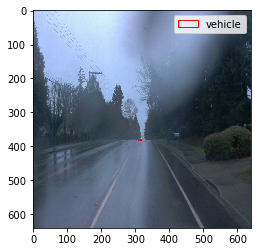

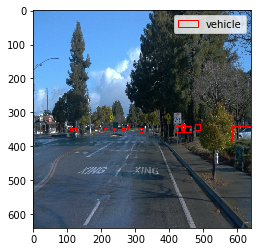

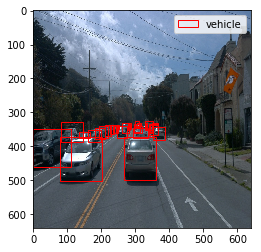

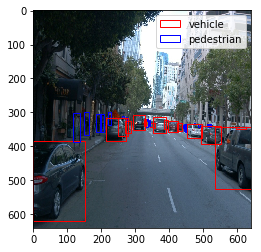

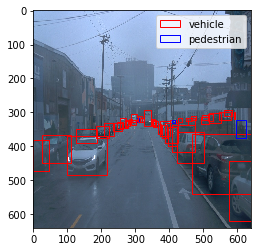

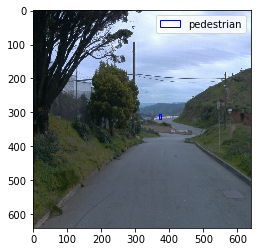

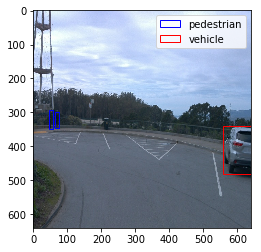

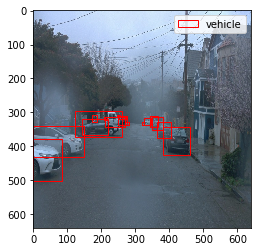

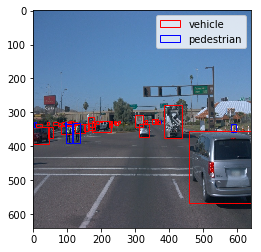

In [57]:
# Shuffle the dataset
shuffled = dataset.shuffle(buffer_size=1000)
# Grab 10 images
batch = dataset.take(10)
# Display each image
display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

### Getting Class Counts and Averages

Averages: {'boxes': 22.035, 'vehicles': 17.2805, 'pedestrians': 4.6184, 'cyclists': 0.1361}


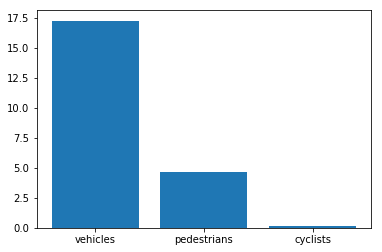

In [44]:
def get_class_counts(batch):
    """
    Given a batch of images, calculates number of boxes for each class
    """
    # Counts
    counts = {
        "boxes" : 0,
        "vehicles" : 0,
        "pedestrians" : 0,
        "cyclists" : 0
    } 
    # Iterate
    for item in batch:
        # Add bboxes
        bboxes = item['groundtruth_boxes']
        counts['boxes'] += bboxes.shape[0]
        # Get unique classes
        classes = item['groundtruth_classes']
        counts['vehicles'] += (np.count_nonzero(classes == 1))
        counts['pedestrians'] += (np.count_nonzero(classes == 2))
        counts['cyclists'] += (np.count_nonzero(classes == 4))
    return counts

def get_class_averages(batch, plot=True):
    """
    Given a batch of iamges, gets the average number of boxes per image
    """
    counts = get_class_counts(batch)
    # Check class distribution
    counts_average = {
        "boxes" : counts['boxes']/NUM_IMAGES,
        "vehicles" : counts['vehicles']/NUM_IMAGES,
        "pedestrians" : counts['pedestrians']/NUM_IMAGES,
        "cyclists" : counts['cyclists']/NUM_IMAGES
    }
    print("Averages: {}".format(counts_average))
    # Plot
    if plot:
        avg_classes = list(counts_average.keys())[1:]
        avg_counts  = list(counts_average.values())[1:]
        plt.bar(avg_classes, avg_counts)
        plt.show()
        
# Determine number of classes for each image
NUM_IMAGES = 10000
shuffled = dataset.shuffle(buffer_size=NUM_IMAGES)
# Grab some images
batch = dataset.take(NUM_IMAGES)
# Calculations
get_class_averages(batch, plot=True)